In [99]:
import urllib.request
import scipy.interpolate as interp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

#### Problem 1

In [100]:
#Years 1960,1970,1980,1990,2000,2010,2020,2050
pop = np.array([3.015470894, 3.694683794, 4.447606236, 5.327803110, 6.171702993, 7.021732148, 7.887001292, 9.664378587])

In [101]:
q1 = interp.lagrange([1980,2000], pop[[2,4]])

pop1990 = q1(1990)

In [102]:
print("Population in {} : est {:.9f} billion, frac error {:.9f}".format(
1990, pop1990, np.abs(1-pop1990/pop[3])))

Population in 1990 : est 5.309654615 billion, frac error 0.003406375


In [103]:
pop1960 = q1(1960)
print("Population in {} : est {:.9f} billion, frac error {:.9f}".format(
1960, pop1960, np.abs(1-pop1960/pop[0])))

pop2020 = q1(2020)
print("Population in {} : est {:.9f} billion, frac error {:.9f}".format(
2020, pop2020, np.abs(1-pop2020/pop[6])))

Population in 1960 : est 2.723509479 billion, frac error 0.096821168
Population in 2020 : est 7.895799750 billion, frac error 0.001115564


In [104]:
pop2050 = q1(2050)
print("Population in {} : est {:.9f} billion".format(2050, pop2050))
pop2100 = q1(2100)
print("Population in {} : est {:.9f} billion".format(2100, pop2100))

Population in 2050 : est 10.481944886 billion
Population in 2100 : est 14.792186778 billion


In [105]:
i2 = interp.lagrange([1970, 1980, 2000], pop[[1,2,4]])
pop1990 = i2(1990)
pop1960 = i2(1960)
pop2020 = i2(2020)
pop2050 = i2(2050)
pop2100 = i2(2100)
print("Population in {} : est {:.9f} billion, frac error {:.9f}".format(
1990, pop1990, np.abs(1-pop1990/pop[3])))
print("Population in {} : est {:.9f} billion, frac error {:.9f}".format(
1960, pop1960, np.abs(1-pop1960/pop[0])))
print("Population in {} : est {:.9f} billion, frac error {:.9f}".format(
2020, pop2020, np.abs(1-pop2020/pop[6])))
print("Population in {} : est {:.9f} billion".format(2050, pop2050))
print("Population in {} : est {:.9f} billion".format(2100, pop2100))

Population in 1990 : est 5.273279302 billion, frac error 0.010233826
Population in 1960 : est 3.014511976 billion, frac error 0.000317999
Population in 2020 : est 8.186802247 billion, frac error 0.038012033
Population in 2050 : est 11.755080811 billion
Population in 2100 : est 19.157224238 billion


#### Question 2

In [106]:
url = 'https://raw.githubusercontent.com/cwru-phys-250/resources/main/data/hw2.dat'
with urllib.request.urlopen(url) as fp:
    (time, position) = np.loadtxt(fp, unpack=True)

print ("Values stored in the `time` array:\n\t", time)
print ("Values stored in the `position` array:\n\t", position)

Values stored in the `time` array:
	 [1. 2. 3. 4. 7. 8. 9.]
Values stored in the `position` array:
	 [-3.4083885 -5.6100975 -5.8256509 -3.9787359  5.3127362  5.9562532
  4.4910645]


In [107]:
posInterpolation = interp.make_interp_spline(time, position)
posInterpolation

In [108]:
print("Position at day {} : {:8f} arcseconds".format(5, posInterpolation(5)))
print("Position at day {} : {:8f} arcseconds".format(6, posInterpolation(6)))

Position at day 5 : -0.746379 arcseconds
Position at day 6 : 2.748133 arcseconds


In [109]:
np.abs(posInterpolation(6)) + np.abs(posInterpolation(5))

np.float64(3.4945125299266233)

In [115]:
np.abs(posInterpolation(4)) + np.abs(posInterpolation(7))

np.float64(9.2914721)

In [110]:
print("Minimum diameter = {} arcseconds".format(2*np.abs(posInterpolation([5,6])).max()))

Minimum diameter = 5.496266525681339 arcseconds


In [111]:
print("Maximum diameter = {} arcseconds".format(2*np.abs(position).min()))

Maximum diameter = 6.816777 arcseconds


In [112]:
?posInterpolation

Signature:      posInterpolation(x, nu=0, extrapolate=None)
Type:           BSpline
String form:    <scipy.interpolate._bsplines.BSpline object at 0x000001AFCBA69310>
File:           c:\users\bhoom\documents\github\physics_coursework\.venv\lib\site-packages\scipy\interpolate\_bsplines.py
Docstring:     
Univariate spline in the B-spline basis.

.. math::

    S(x) = \sum_{j=0}^{n-1} c_j  B_{j, k; t}(x)

where :math:`B_{j, k; t}` are B-spline basis functions of degree `k`
and knots `t`.

Parameters
----------
t : ndarray, shape (n+k+1,)
    knots
c : ndarray, shape (>=n, ...)
    spline coefficients
k : int
    B-spline degree
extrapolate : bool or 'periodic', optional
    whether to extrapolate beyond the base interval, ``t[k] .. t[n]``,
    or to return nans.
    If True, extrapolates the first and last polynomial pieces of b-spline
    functions active on the base interval.
    If 'periodic', periodic extrapolation is used.
    Default is True.
axis : int, optional
    Interpolation 

In [113]:
# Brackets for roots came from looking at a quick plot.
t1 = opt.brentq(posInterpolation, 1, 4, args=(1))
t2 = opt.brentq(posInterpolation, 7, 9, args=(1))
print("Full period = {} days".format(2*np.abs(t1-t2)))

Full period = 10.395713109337262 days


(0.0, 12.0)

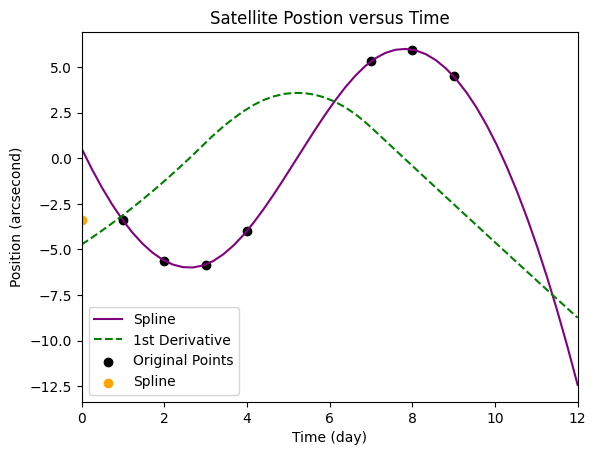

In [114]:
fig = plt.figure()

ax = fig.add_subplot(111)
time12 = np.linspace(0,12,50)


postion = posInterpolation(time12)

ax.plot(time12, posInterpolation(time12), color = 'purple', label = "Spline")
ax.plot(time12, posInterpolation(time12,nu=1), 'g--', label = "1st Derivative")
ax.scatter(time, position, color = 'k', label = "Original Points")
ax.scatter(0, position[0], color = 'orange', label = "Spline")

plt.legend()

ax.set_xlabel("Time (day)")
ax.set_ylabel("Position (arcsecond)")
ax.set_title("Satellite Postion versus Time")
ax.set_xlim(0,12)